In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import time

In [2]:
start_date = '2010-01-01'
end_date = '2019-12-31'

df = yf.download('AAPL', start=start_date, end=end_date)
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.487533,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.498750,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.395380,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.383555,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.425995,447610800
...,...,...,...,...,...,...
2019-12-23,70.132500,71.062500,70.092499,71.000000,69.261589,98572000
2019-12-24,71.172501,71.222504,70.730003,71.067497,69.327438,48478800
2019-12-26,71.205002,72.495003,71.175003,72.477501,70.702927,93121200


In [3]:
#When you reset the index, the current index is replaced with a default integer index (0, 1, 2, ...)

df = df.reset_index()
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.487533,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.498750,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.395380,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.383555,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.425995,447610800
...,...,...,...,...,...,...,...
2510,2019-12-23,70.132500,71.062500,70.092499,71.000000,69.261589,98572000
2511,2019-12-24,71.172501,71.222504,70.730003,71.067497,69.327438,48478800
2512,2019-12-26,71.205002,72.495003,71.175003,72.477501,70.702927,93121200
2513,2019-12-27,72.779999,73.492500,72.029999,72.449997,70.676102,146266000


In [4]:
#Dropping unnecessary columns

drop_columns = ['Date', 'Adj Close']
df = df.drop(drop_columns, axis = 1)
df

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800
...,...,...,...,...,...
2510,70.132500,71.062500,70.092499,71.000000,98572000
2511,71.172501,71.222504,70.730003,71.067497,48478800
2512,71.205002,72.495003,71.175003,72.477501,93121200
2513,72.779999,73.492500,72.029999,72.449997,146266000


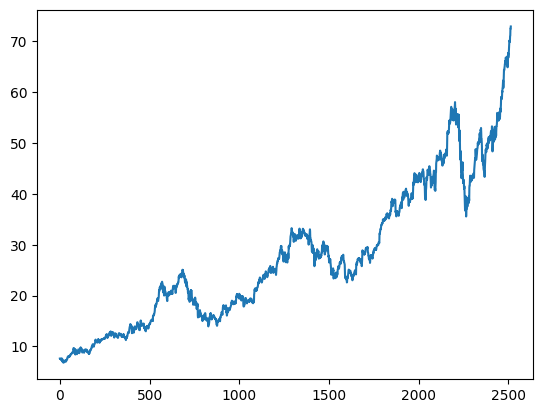

In [5]:
plt.plot(df.Close)

In [6]:
#100 days moving average to predict 101th day closing price

ma100 = df.Close.rolling(100).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2510    59.201075
2511    59.401700
2512    59.643125
2513    59.875125
2514    60.106325
Name: Close, Length: 2515, dtype: float64

In [7]:
#200 days moving average to predict 101th day closing price

ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2510    54.132313
2511    54.261513
2512    54.396763
2513    54.529350
2514    54.661100
Name: Close, Length: 2515, dtype: float64

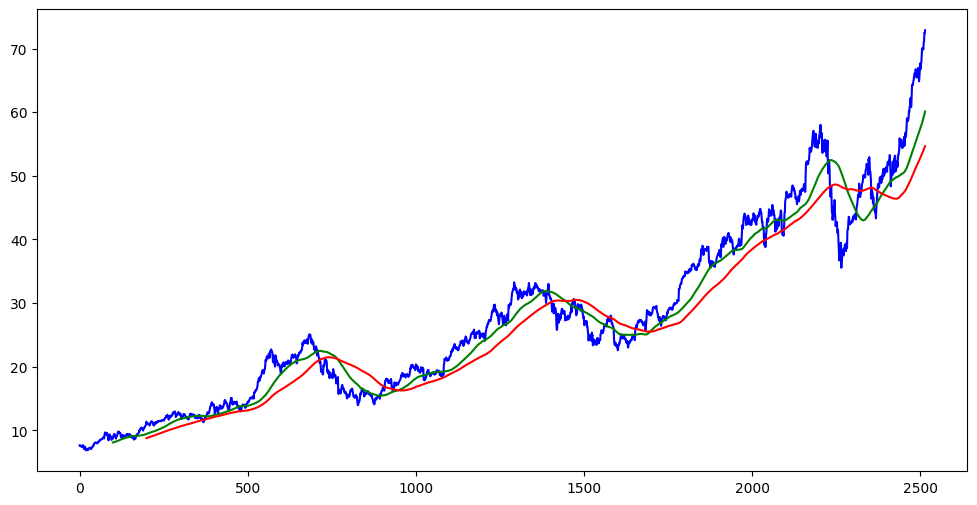

In [8]:
plt.figure(figsize = (12, 6))
plt.plot(df.Close, 'b')
plt.plot(ma100, 'g')
plt.plot(ma200, 'r')

In [9]:
df.shape

(2515, 5)

In [10]:
#Splitting training and testing data

data_training = pd.DataFrame(df['Close'][0 : int(len(df)*0.70)]) #70%
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70) : int(len(df))]) #30%

In [12]:
print(data_training.shape, data_testing.shape)

(1760, 1) (755, 1)


In [13]:
data_training

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714
...,...
1755,29.264999
1756,29.072500
1757,29.129999
1758,29.315001


In [14]:
data_testing

,Close
1760,29.182501
1761,28.955000
1762,29.037500
1763,29.004999
1764,29.152500
...,...
2510,71.000000
2511,71.067497
2512,72.477501
2513,72.449997


In [20]:
#Downsscaling the values between the range 0 and 1

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))

In [21]:
data_training_arr = scaler.fit_transform(data_training)
data_training_arr

array([[0.02971782],
       [0.03021854],
       [0.02560389],
       ...,
       [0.84388656],
       [0.85089656],
       [0.84616011]])

In [22]:
data_training_arr.shape

(1760, 1)

In [23]:
x_train = [] #Features i.e, past 100 days value
y_train = [] #Ground truth i.e, 101th day value (actual)

for i in range(100, data_training_arr.shape[0]):
    x_train.append(data_training_arr[i-100:i])
    y_train.append(data_training_arr[i, 0])  #One single column value of ground truths

x_train, y_train = np.array(x_train), np.array(y_train)

In [24]:
x_train.shape

(1660, 100, 1)

In [2]:
# Machine Learning Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dropout, Dense

In [21]:
LSTMmodel = Sequential()
LSTMmodel.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1], 1))) #100 values as feature of input and interested in 1 column only
LSTMmodel.add(Dropout(0.2))

LSTMmodel.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
LSTMmodel.add(Dropout(0.3))

LSTMmodel.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
LSTMmodel.add(Dropout(0.4))

#Last LSTM layer
LSTMmodel.add(LSTM(units = 120, activation = 'relu'))
LSTMmodel.add(Dropout(0.5))

#Dense layer or Fully Connected Layer
LSTMmodel.add(Dense(units = 1))

In [22]:
GRUmodel = Sequential()
GRUmodel.add(GRU(units=50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], 1))) # Input layer
GRUmodel.add(Dropout(0.2))

GRUmodel.add(GRU(units=60, activation='relu', return_sequences=True)) # Hidden layer 1
GRUmodel.add(Dropout(0.3))

GRUmodel.add(GRU(units=80, activation='relu', return_sequences=True)) # Hidden layer 2
GRUmodel.add(Dropout(0.4))

GRUmodel.add(GRU(units=120, activation='relu')) # Hidden layer 3
GRUmodel.add(Dropout(0.5))

GRUmodel.add(Dense(units=1)) # Output layer

In [23]:
LSTMmodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [24]:
GRUmodel.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 100, 50)           7950      
                                                                 
 dropout_4 (Dropout)         (None, 100, 50)           0         
                                                                 
 gru_1 (GRU)                 (None, 100, 60)           20160     
                                                                 
 dropout_5 (Dropout)         (None, 100, 60)           0         
                                                                 
 gru_2 (GRU)                 (None, 100, 80)           34080     
                                                                 
 dropout_6 (Dropout)         (None, 100, 80)           0         
                                                                 
 gru_3 (GRU)                 (None, 120)              

In [25]:
#Training the ML model

LSTMmodel.compile(optimizer = 'adam', loss = 'mean_squared_error')
GRUmodel.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [27]:
start_time = int(time.time())
LSTMmodel.fit(x_train, y_train, epochs = 50)
end_time = int(time.time())

print(f"Total Time Required to train LSTM model is : {end_time - start_time}")

Epoch 1/50
52/52 [==============================] - 13s 173ms/step - loss: 0.0732
Epoch 2/50
52/52 [==============================] - 9s 172ms/step - loss: 0.0139
Epoch 3/50
52/52 [==============================] - 9s 171ms/step - loss: 0.0112
Epoch 4/50
52/52 [==============================] - 9s 163ms/step - loss: 0.0098
Epoch 5/50
52/52 [==============================] - 9s 173ms/step - loss: 0.0080
Epoch 6/50
52/52 [==============================] - 9s 173ms/step - loss: 0.0087
Epoch 7/50
52/52 [==============================] - 9s 172ms/step - loss: 0.0077
Epoch 8/50
52/52 [==============================] - 9s 167ms/step - loss: 0.0086
Epoch 9/50
52/52 [==============================] - 9s 168ms/step - loss: 0.0067
Epoch 10/50
52/52 [==============================] - 9s 174ms/step - loss: 0.0084
Epoch 11/50
52/52 [==============================] - 9s 174ms/step - loss: 0.0074
Epoch 12/50
52/52 [==============================] - 9s 174ms/step - loss: 0.0062
Epoch 13/50
52/52 [=====

In [29]:
start_time = int(time.time())
GRUmodel.fit(x_train, y_train, epochs = 50)
end_time = int(time.time())

print(f"Total Time Required to train LSTM model is : {end_time - start_time}")

Epoch 1/50
52/52 [==============================] - 12s 151ms/step - loss: 0.0629
Epoch 2/50
52/52 [==============================] - 8s 158ms/step - loss: 0.0106
Epoch 3/50
52/52 [==============================] - 8s 159ms/step - loss: 0.0089
Epoch 4/50
52/52 [==============================] - 8s 153ms/step - loss: 0.0082
Epoch 5/50
52/52 [==============================] - 8s 151ms/step - loss: 0.0096
Epoch 6/50
52/52 [==============================] - 8s 158ms/step - loss: 0.0079
Epoch 7/50
52/52 [==============================] - 8s 160ms/step - loss: 0.0067
Epoch 8/50
52/52 [==============================] - 8s 150ms/step - loss: 0.0077
Epoch 9/50
52/52 [==============================] - 9s 166ms/step - loss: 0.0075
Epoch 10/50
52/52 [==============================] - 8s 159ms/step - loss: 0.0067
Epoch 11/50
52/52 [==============================] - 8s 159ms/step - loss: 0.0067
Epoch 12/50
52/52 [==============================] - 8s 151ms/step - loss: 0.0061
Epoch 13/50
52/52 [=====

In [30]:
LSTMmodel.save('LSTM_Model.h5')
GRUmodel.save('GRU_Model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [13]:
import tensorflow

LSTMmodel = tensorflow.keras.models.load_model('/content/LSTM_Model.h5')
GRUmodel = tensorflow.keras.models.load_model('/content/GRU_Model.h5')

In [14]:
data_testing

,Close
1760,29.182501
1761,28.955000
1762,29.037500
1763,29.004999
1764,29.152500
...,...
2510,71.000000
2511,71.067497
2512,72.477501
2513,72.449997


In [15]:
past_100_days = data_training.tail(100) #For predicting first value for the test data

In [16]:
past_100_days

,Close
1660,27.092501
1661,27.202499
1662,27.000000
1663,26.982500
1664,27.045000
...,...
1755,29.264999
1756,29.072500
1757,29.129999
1758,29.315001


In [25]:
final_df = past_100_days._append(data_testing, ignore_index = True)

In [26]:
final_df

,Close
0,27.092501
1,27.202499
2,27.000000
3,26.982500
4,27.045000
...,...
850,71.000000
851,71.067497
852,72.477501
853,72.449997


In [ ]:
input_data = scaler.fit_transform(final_df)
input_data

In [28]:
input_data.shape

(855, 1)

In [29]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i, 0])

x_test, y_test = np.array(x_test), np.array(y_test)

In [30]:
print(x_test.shape, y_test.shape)

(755, 100, 1) (755,)


In [31]:
#Predicted Values
y_predictedLSTM = LSTMmodel.predict(x_test)
y_predictedGRU = GRUmodel.predict(x_test)

24/24 [==============================] - 1s 31ms/step


In [32]:
y_predictedLSTM.shape

(755, 1)

In [ ]:
y_test

In [ ]:
y_predictedLSTM

In [35]:
import sklearn.metrics as sm

In [36]:
print("Mean squared error of LSTM model =", round(sm.mean_squared_error(y_test, y_predictedLSTM), 4))
print("R2 score of LSTM model =", round(sm.r2_score(y_test, y_predictedLSTM), 4))

Mean squared error of LSTM model = 0.0119
R2 score of LSTM model = 0.6409


In [37]:
print("Mean squared error of GRU model =", round(sm.mean_squared_error(y_test, y_predictedGRU), 4))
print("R2 score of GRU model =", round(sm.r2_score(y_test, y_predictedGRU), 4))

Mean squared error of GRU model = 0.0023
R2 score of GRU model = 0.9306


In [38]:
#Scaling factor
scaler.scale_

array([0.02123255])

In [40]:
scale_factor = 1/scaler.scale_[0]
y_predictedLSTM = y_predictedLSTM * scale_factor
y_predictedGRU = y_predictedGRU * scale_factor
y_test = y_test * scale_factor

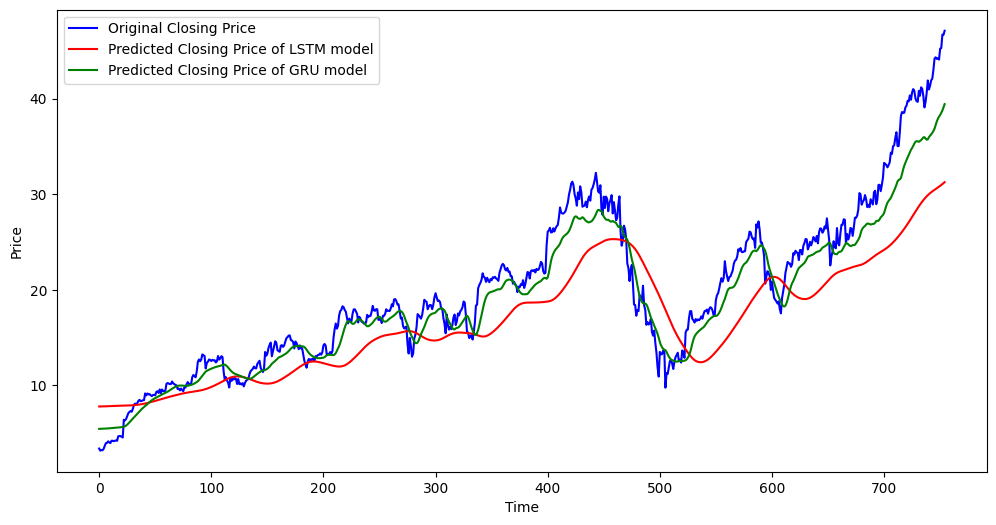

In [43]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Closing Price')
plt.plot(y_predictedLSTM, 'r', label = 'Predicted Closing Price of LSTM model')
plt.plot(y_predictedGRU, 'g', label = 'Predicted Closing Price of GRU model')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()